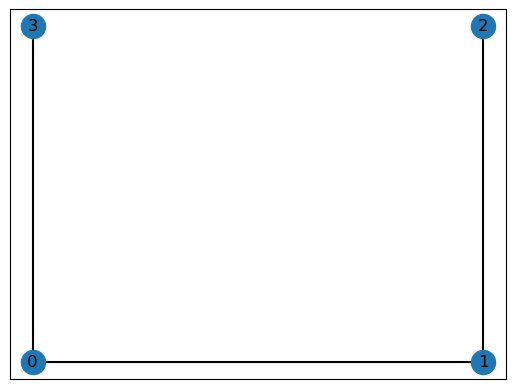

In [1]:
from track_linearization import make_track_graph, plot_track_graph
import matplotlib.pyplot as plt

node_positions = [
    (0, 0),  # xy position of node 0
    (30, 0),  # xy position of node 1
    (30, 30),  # xy position of node 2
    (0, 30),  # xy position of node 3
]

edges = [
    (0, 1),  # connects node 0 and node 1
    (0, 3),  # connects node 0 and node 3
    (1, 2),  # connects node 1 and node 2
]

track_graph = make_track_graph(node_positions, edges)

plot_track_graph(track_graph)
for i, pos in enumerate(node_positions):
    plt.text(pos[0], pos[1], str(i), fontsize=12, ha='center', va='center')

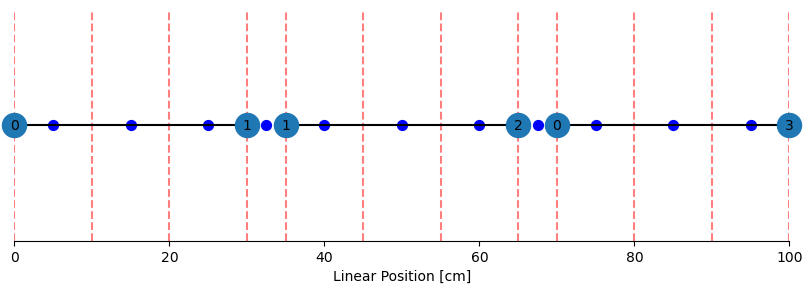

In [2]:
from track_linearization import plot_graph_as_1D
import numpy as np


true_linear_bin_edges = np.array([
    0.0, 10.0, 20.0, 30.0, 35.0, 45.0, 55.0, 65.0, 70.0, 80.0, 90.0, 100.0
])
true_linear_bin_centers = np.array([
    5.0, 15.0, 25.0, 32.5, 40.0, 50.0, 60.0, 67.5, 75.0, 85.0, 95.0,
])

plt.figure(figsize=(10, 3))
plot_graph_as_1D(
    track_graph,
    edge_order=[(0, 1), (1, 2), (0, 3)],
    edge_spacing=5.0,
)
plt.scatter(
    true_linear_bin_centers,
    [0] * len(true_linear_bin_centers),
    marker="o",
    color="blue",
    label="True Bin Centers",
    s=50,
)
for edge in true_linear_bin_edges:
    plt.axvline(edge, color="red", linestyle="--", alpha=0.5)

In [3]:
from non_local_detector.environment.layout.helpers.graph import _get_graph_bins

bin_centers_1d, edges, active_mask_1d, edge_ids_for_active_bins = _get_graph_bins(
    graph=track_graph,
    edge_order=[(0, 1), (1, 2), (0, 3)],
    edge_spacing=5.0,
    bin_size=10.0,
)

/Users/edeno/Documents/GitHub/non_local_detector/src/non_local_detector/likelihoods/clusterless_kde.py:54: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
bin_centers_1d

array([ 5. , 15. , 25. , 32.5, 40. , 50. , 60. , 67.5, 75. , 85. , 95. ])

In [5]:
true_linear_bin_centers

array([ 5. , 15. , 25. , 32.5, 40. , 50. , 60. , 67.5, 75. , 85. , 95. ])

In [6]:
edges[0]

array([  0.,  10.,  20.,  30.,  35.,  45.,  55.,  65.,  70.,  80.,  90.,
       100.])

In [7]:
true_linear_bin_edges

array([  0.,  10.,  20.,  30.,  35.,  45.,  55.,  65.,  70.,  80.,  90.,
       100.])

In [8]:
np.allclose(true_linear_bin_centers, bin_centers_1d), np.allclose(true_linear_bin_edges, edges[0])

(True, True)

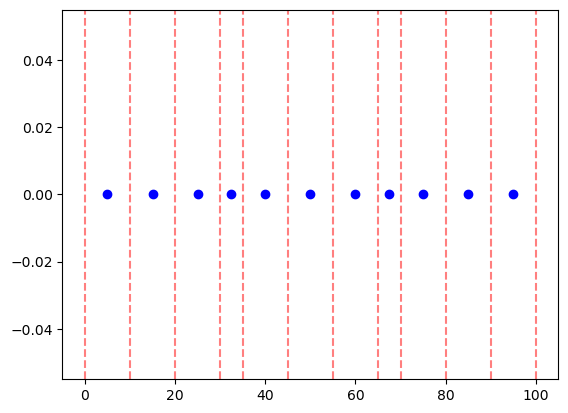

In [9]:
fig, ax = plt.subplots()
plt.scatter(
    bin_centers_1d,
    [0] * len(bin_centers_1d),
    marker="o",
    color="blue",
    label="Bin Centers",
)
for i in edges[0]:
    ax.axvline(i, color="red", linestyle="--", alpha=0.5)

In [10]:
from non_local_detector.environment.layout.helpers.graph import _get_graph_bins

bin_centers_1d, edges, active_mask_1d, edge_ids_for_active_bins = _get_graph_bins(
    graph=track_graph,
    edge_order=[(0, 1), (1, 2), (0, 3)],
    edge_spacing=[5.0, 5.0],
    bin_size=10.0,
)
np.allclose(true_linear_bin_centers, bin_centers_1d), np.allclose(
    true_linear_bin_edges, edges[0]
)

(True, True)

All bin centers (including gaps): [ 0.83333333  2.5         4.16666667  7.5        11.         13.
 15.         17.         19.        ]
Active mask: [ True  True  True False  True  True  True  True  True]
Active bin centers (on track): [ 0.83333333  2.5         4.16666667 11.         13.         15.
 17.         19.        ]
Inactive bin centers (gap): [7.5]


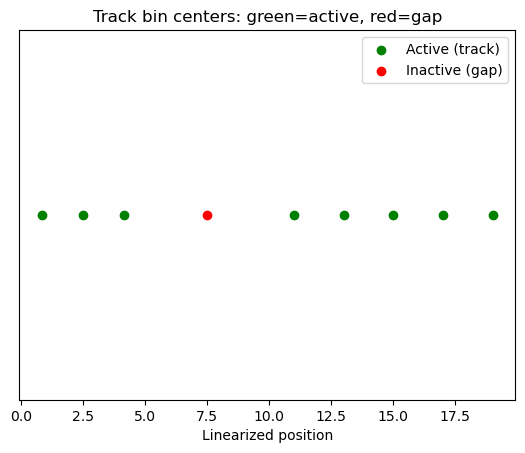

In [11]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

# ---- Simulated simple track with a gap between two segments ----

node_positions = np.array(
    [
        [0, 0],  # node 0
        [5, 0],  # node 1
        [15, 0],  # node 2
    ]
)
edges = np.array(
    [
        [0, 1],
        [1, 2],
    ]
)

track_graph = make_track_graph(node_positions, edges)
edge_order = [(0, 1), (1, 2)]
edge_spacing = 5  # 5-unit gap between edges
bin_size = 2

# Call the helper
from non_local_detector.environment.layout.helpers.graph import _get_graph_bins

bin_centers_1d, (bin_edges_1d,), active_mask_1d, edge_ids_for_active_bins = (
    _get_graph_bins(
        graph=track_graph,
        edge_order=edge_order,
        edge_spacing=edge_spacing,
        bin_size=bin_size,
    )
)

print("All bin centers (including gaps):", bin_centers_1d)
print("Active mask:", active_mask_1d)
print("Active bin centers (on track):", bin_centers_1d[active_mask_1d])
print("Inactive bin centers (gap):", bin_centers_1d[~active_mask_1d])

# -- Plot to show gap bins visually --
plt.scatter(
    bin_centers_1d[active_mask_1d],
    np.zeros_like(bin_centers_1d[active_mask_1d]),
    label="Active (track)",
    color="g",
)
plt.scatter(
    bin_centers_1d[~active_mask_1d],
    np.zeros_like(bin_centers_1d[~active_mask_1d]),
    label="Inactive (gap)",
    color="r",
)
plt.xlabel("Linearized position")
plt.yticks([])
plt.legend()
plt.title("Track bin centers: green=active, red=gap")
plt.show()